## Course: DSC530
## Assignment: 7.2, Relationships Between Variables and Estimations
## Name: Laura Hoffmann
## Date: 10/16/2020

### Setup

In [1]:
import numpy as np
import thinkstats2
import thinkplot
import nsfg
import random

# 7-1

In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
ages = live.agepreg
weights = live.totalwgt_lb
    
def BinnedPercentiles(df):
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)
    
    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Config(xlabel="Mother's Age (Years)",
                     ylabel='Birth Weight (lbs.)',
                     xlim=[10, 45], legend=True)

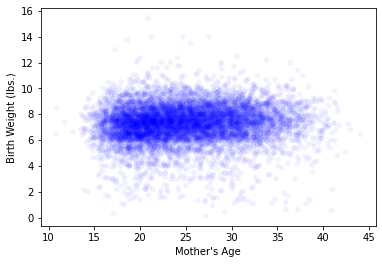

<Figure size 576x432 with 0 Axes>

In [3]:
thinkplot.scatter(ages, weights, alpha=.05)
thinkplot.Show(xlabel="Mother's Age",ylabel="Birth Weight (lbs.)")

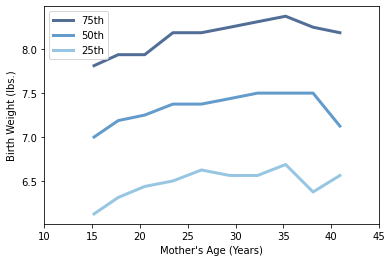

In [4]:
BinnedPercentiles(live)

In [5]:
print("Pearson's Correlation:", round(thinkstats2.Corr(ages, weights),4))
print("Spearman's Correlation:", round(thinkstats2.SpearmanCorr(ages, weights),4))

Pearson's Correlation: 0.0688
Spearman's Correlation: 0.0946


#### Visually from the scatter plot we can see that there is not a lot of correlation between the two variables, mother's age and birth weight of the baby. The Pearson's correlation and the Spearman's correlation make this even more clear because their values are so low supporting the fact that the relationship is weak. 

# 8-1

In [6]:
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def Estimate1(n=7, iters=10000):
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('Mean error xbar:', round(MeanError(means, mu),4))
    print('Mean error median:', round(MeanError(medians, mu),4))
    
Estimate1()

Experiment 1
Mean error xbar: -0.0001
Mean error median: 0.0026


In [7]:
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def Estimate2(n=7, iters=100):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2, m=100')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

Estimate2()

def Estimate3(n=7, iters=100000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 3, m=100,000')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

Estimate3()

Experiment 2, m=100
RMSE biased 0.4879952321319652
RMSE unbiased 0.5733659986198616
Experiment 3, m=100,000
RMSE biased 0.5154966843882941
RMSE unbiased 0.5781178818533279


#### As iters (m) increases, xbar and median will yield lower mean error thus proving this experiment to not be biased, however, there is less error with xbar. The unbiased estimator is just a little bit higher than the biased estimator and the difference between the two seems to hold as the iters increase. 

# 8-2

Standard Error: 0.8302
Confidence Interval: (1.267, 3.617)


0.8302235061154414

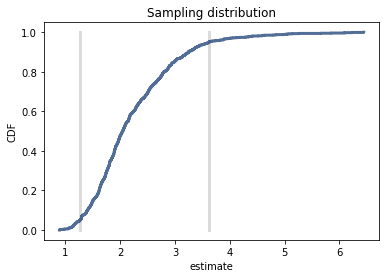

In [8]:
def SimulateSample(lam, n, iters):
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8')

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('Standard Error:', round(stderr,4))

    cdf = thinkstats2.Cdf(estimates)
    ci = round(cdf.Percentile(5),4), round(cdf.Percentile(95),4)
    print('Confidence Interval:', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate', ylabel='CDF', title='Sampling distribution')

    return stderr

SimulateSample(2, 10, 1000)

Standard Error: 0.2002
Confidence Interval: (1.7104, 2.3493)


0.20017837760556037

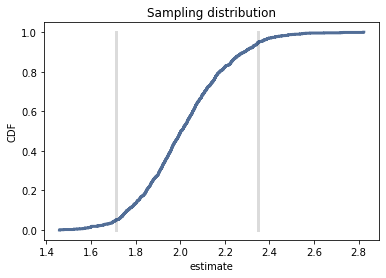

In [9]:
SimulateSample(2, 100, 1000)

Standard Error: 0.0626
Confidence Interval: (1.9008, 2.1121)


0.06264746048137053

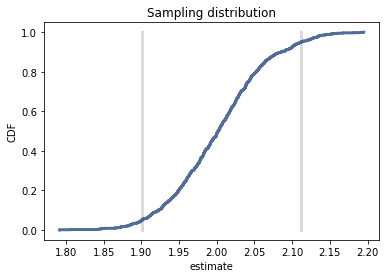

In [10]:
SimulateSample(2, 1000, 1000)

### With sample size 10:
##### Standard Error: 0.8104
##### Confidence Interval: (1.2635, 3.6772)

### With sample size 100:
##### Standard Error: 0.1983
##### Confidence Interval: (1.7123, 2.3614)

### With sample size 1000:
##### Standard Error: 0.0625
##### Confidence Interval: (1.8971, 2.1028)


### As sample size increases, the standard error decreases. Also with an increase in the sample size comes a decrease in the confidence interval. Eventually with a large enough sample size, the confidence interval would just come down to lam. 

Sample Size | Confidence Intervals
-----------------------------------
    10      |       .8104         
    100     |       .1983         
    1000    |       .0625         


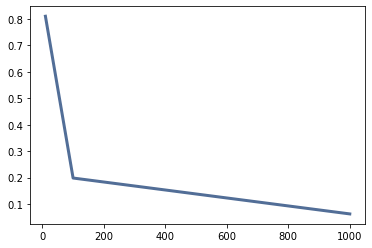

In [11]:
Ns = [10,100,1000]
SEs = [.8104, .1983, .0625]
print("Sample Size | Confidence Intervals")
print("-"*35)
print("    10      |       .8104         ")
print("    100     |       .1983         ")
print("    1000    |       .0625         ")
thinkplot.Plot(Ns, SEs)